<a href="https://colab.research.google.com/github/sirlapat/ML_Assignment1/blob/main/ML_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score,average_precision_score, log_loss
import warnings
warnings.filterwarnings("ignore")


In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

In [131]:
#Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Display the first 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
df.shape

(768, 9)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [134]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [135]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [136]:
X.shape, y.shape

((768, 8), (768,))

In [137]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [138]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
69,4,146,85,27,100,28.9,0.189,27
85,2,110,74,29,125,32.4,0.698,27
219,5,112,66,0,0,37.8,0.261,41
712,10,129,62,36,0,41.2,0.441,38


In [139]:
y_train.head()

660    0
69     0
85     0
219    1
712    1
Name: Outcome, dtype: int64

In [140]:

scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train) # standardization of dependent variables
X_train_scaled.shape

(614, 8)

In [141]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [142]:
model.coef_

array([[ 0.34793889,  1.1672818 , -0.20092548, -0.0538404 , -0.0883781 ,
         0.75212144,  0.42169378,  0.24350804]])

In [143]:
model.score(X_train_scaled, y_train)

0.7915309446254072

In [144]:
X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [145]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 15],
       [26, 27]])

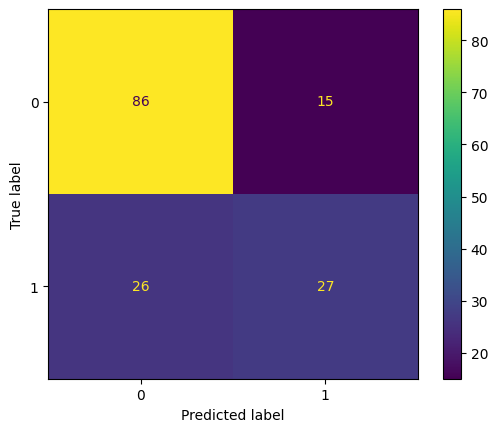

In [146]:
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix,
                             display_labels = model.classes_)
disp.plot()

In [147]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7337662337662337, 0.6428571428571429, 0.5094339622641509, 0.568421052631579)

In [148]:
probs = model.predict_proba(X_test_scaled)
precision, recall,  thersholds = precision_recall_curve(y_test, probs[:,1])

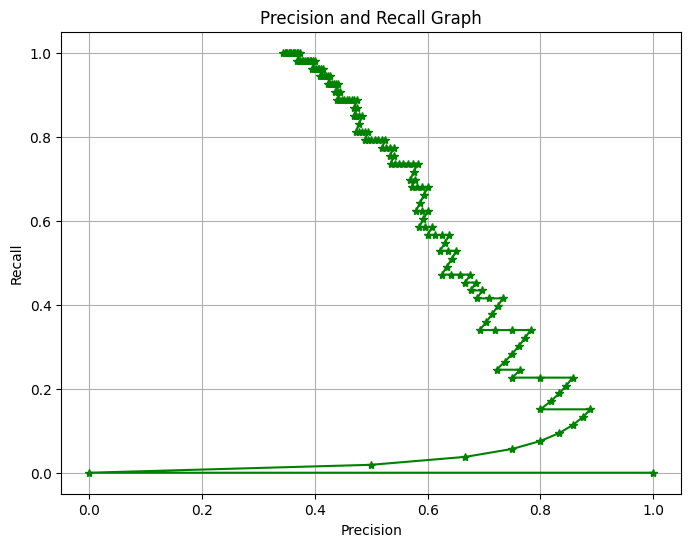

In [149]:
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, color ='green', marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall Graph')
plt.grid(True)
plt.show()


In [150]:
y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

23.639019430524886

In [151]:
#Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/cancer.csv')

# Display the first 5 rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [153]:
df = df.drop(columns = ['id', 'Unnamed: 32'])

In [154]:
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [155]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [156]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [157]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.243900,0.06493,0.2372,0.07242
351,15.75,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.124200,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.50460,0.687200,0.21350,0.4245,0.10500
136,11.71,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.1271,0.10280,0.104600,0.06968,0.1712,0.07343
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.1276,0.25060,0.202800,0.10530,0.3035,0.07661


In [158]:
y_train.head()

58     0
554    0
351    1
136    0
497    0
Name: diagnosis, dtype: int64

In [159]:
scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train) # standardization of dependent variables
X_train_scaled.shape

(455, 30)

In [160]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [161]:
model.score(X_train_scaled, y_train)

0.9934065934065934

In [162]:
X_test_scaled = scale.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [163]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [164]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [165]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9736842105263158, 1.0, 0.9387755102040817, 0.968421052631579)

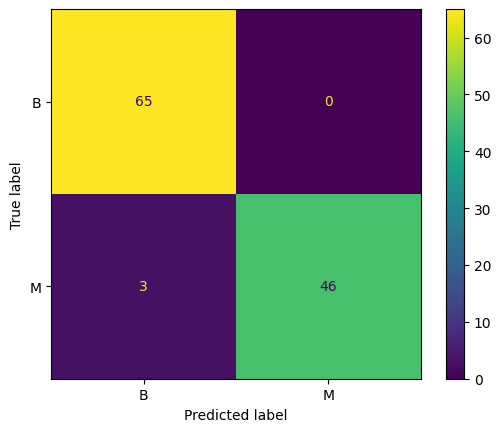

In [166]:
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix,
                             display_labels = ['B', 'M'])
disp.plot()

In [167]:
probs = model.predict_proba(X_test_scaled)
precision, recall,  thersholds = precision_recall_curve(y_test, probs[:,1])

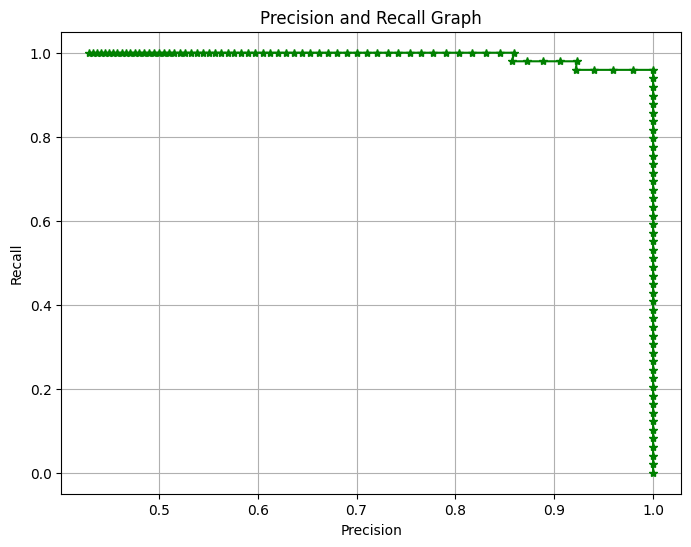

In [168]:
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, color = 'green', marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall Graph')
plt.grid(True)
plt.show()

In [169]:
y_pred_prob = model.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774

In [170]:
C = [10, 1, .1, .001]

for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    print('C:', c)
    y_pred = model.predict(X_test_scaled)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred),
         "\nPrecision Score: ", precision_score(y_test, y_pred),
         "\nRecall Score: ", recall_score(y_test, y_pred),
          "\nF1 Score: ", f1_score(y_test, y_pred))
    print('Training accuracy:', model.score(X_train_scaled, y_train))
    print('Test accuracy:', model.score(X_test_scaled, y_test))
    print('')


C: 10
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333333
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 1
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

C: 0.1
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383
Training accuracy: 0.978021978021978
Test accuracy: 0.9649122807017544

C: 0.001
Accuracy Score:  0.5701754385964912 
Precision Score:  0.0 
Recall Score:  0.0 
F1 Score:  0.0
Training accuracy: 0.6417582417582418
Test accuracy: 0.5701754385964912



In [171]:
C = [10, 1, .1, .001]
for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    print('C:', c)
    print('Coefficients:', model.coef_)
    print('Training accuracy:', model.score(X_train_scaled, y_train))
    print('Test accuracy:', model.score(X_test_scaled, y_test))
    print('')

C: 10
Coefficients: [[-0.91056559  0.          0.          0.          0.         -4.00122478
   3.53366706  3.00019864 -1.1575741  -0.50545489  1.53282808 -0.30486854
   0.         11.84572147  0.44354238 -0.07614578 -1.11298227  3.51186453
  -0.87358581 -5.60571959  0.          2.79868846  5.13218227  0.
   1.64586167 -0.49214215  0.63208731  0.          2.29182686  5.06986355]]
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 1
Coefficients: [[ 0.          0.07841804  0.          0.          0.          0.
   0.62112671  0.82269472  0.         -0.23331244  2.45071429  0.
   0.          0.29608706  0.25709274 -0.83643764  0.          0.
   0.         -0.21728553  0.          1.39038148  1.03878698  2.82948818
   0.66694019  0.          0.48224247  1.51638898  0.61065915  0.        ]]
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

C: 0.1
Coefficients: [[0.         0.         0.         0.         0.         0.
  0.         0.6253641

In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
model_nb.score(X_train_scaled, y_train)

0.9362637362637363

In [174]:
y_pred = model_nb.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))


Accuracy Score:  0.9385964912280702 
Precision Score:  0.9565217391304348 
Recall Score:  0.8979591836734694 
F1 Score:  0.9263157894736843


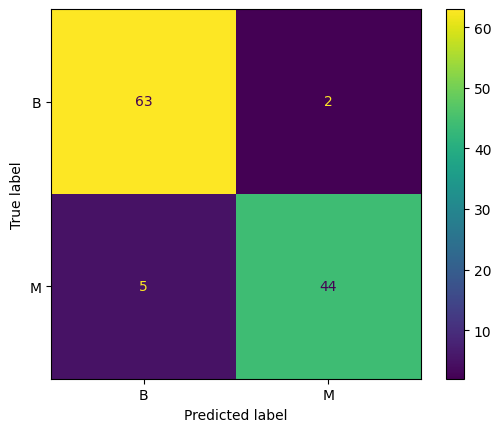

In [175]:
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix,
                             display_labels = ['B', 'M'])
disp.plot()

In [176]:
y_pred_prob = model_nb.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

20.551205879759774

In [177]:
from sklearn.decomposition import PCA

In [178]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [179]:
def pca_components(percentage):
    pca=PCA(percentage)
    xpca=pca.fit_transform(X_scaled)
    return pca.n_components_

In [180]:
for i in range(80,100,1):
    components=pca_components(i/100)
    print('for the explained variance ratio {},{} these are the number of components that hold the information'.format(i,components))

for the explained variance ratio 80,5 these are the number of components that hold the information
for the explained variance ratio 81,5 these are the number of components that hold the information
for the explained variance ratio 82,5 these are the number of components that hold the information
for the explained variance ratio 83,5 these are the number of components that hold the information
for the explained variance ratio 84,5 these are the number of components that hold the information
for the explained variance ratio 85,6 these are the number of components that hold the information
for the explained variance ratio 86,6 these are the number of components that hold the information
for the explained variance ratio 87,6 these are the number of components that hold the information
for the explained variance ratio 88,6 these are the number of components that hold the information
for the explained variance ratio 89,7 these are the number of components that hold the information
for the ex

In [181]:
pca = PCA()
mxpca=pca.fit_transform(X_scaled)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

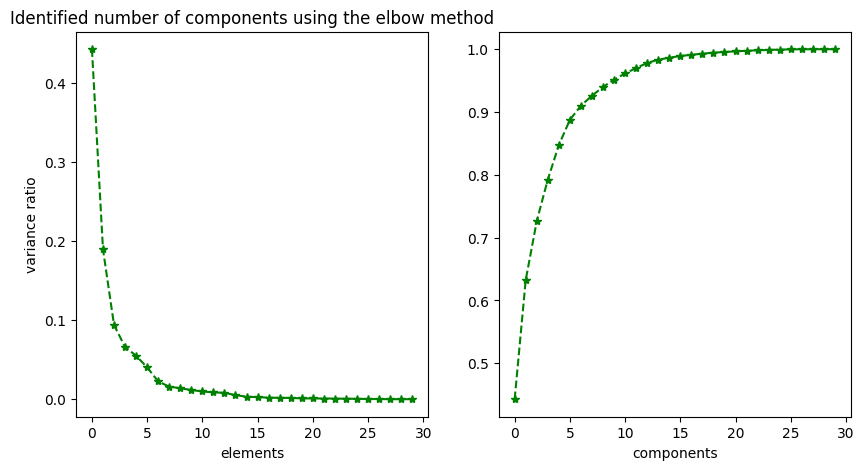

In [194]:
evr=pca.explained_variance_ratio_
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(evr,'s--', color = 'green', marker = '*')
plt.xlabel('elements')
plt.ylabel('variance ratio')
plt.title('Identified number of components using the elbow method')

cuv=np.cumsum(evr)
plt.subplot(1,2,2)
plt.plot(cuv,'s--',color = 'green', marker = '*')
plt.xlabel('components')
plt.ylabel

In [183]:
pca_opt = PCA(n_components=6)

In [184]:
principalComponents = pca_opt.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(i) for i in range(1,7)])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,9.192837,1.948583,-1.123167,3.633732,-1.195106,1.411436
1,2.387802,-3.768172,-0.529292,1.118262,0.621771,0.028646
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541456
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053421
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226496


In [185]:
principalDf['target'] = y

In [186]:
principalDf.shape

(569, 7)

In [187]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,target
0,9.192837,1.948583,-1.123167,3.633732,-1.195106,1.411436,1
1,2.387802,-3.768172,-0.529292,1.118262,0.621771,0.028646,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541456,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053421,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226496,1


In [188]:
X_principal = principalDf.drop(columns=['target'])
y_principal = principalDf['target']

In [189]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                   y_principal,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 6), (114, 6), (455,), (114,))

In [190]:
principal_model_log = LogisticRegression()
principal_model_log.fit(X_train, y_train)
principal_model_log.score(X_train, y_train)
y_pred = principal_model_log.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474228


In [191]:

principal_model_nb = GaussianNB()
principal_model_nb.fit(X_train, y_train)
principal_model_nb.score(X_train, y_train)
y_pred = principal_model_nb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred),
      "\nPrecision Score: ", precision_score(y_test, y_pred),
      "\nRecall Score: ", recall_score(y_test, y_pred),
      "\nF1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369


In [192]:
for i in range(6, 30, 2):
  pca_opt = PCA(n_components=i)
  principalComponents = pca_opt.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(j) for j in range(1,i+1)])
  principalDf['target'] = y
  X_principal = principalDf.drop(columns=['target'])
  y_principal = principalDf['target']
  np.random.seed(9)
  X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principal_model_log = LogisticRegression()
  principal_model_log.fit(X_train, y_train)
  principal_model_log.score(X_train, y_train)
  y_pred = principal_model_log.predict(X_test)
  print("\nK: ", i)
  print("max ratio: ", np.cumsum(pca_opt.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test, y_pred),
        "\nPrecision Score: ", precision_score(y_test, y_pred),
        "\nRecall Score: ", recall_score(y_test, y_pred),
        "\nF1 Score: ", f1_score(y_test, y_pred))



K:  6
max ratio:  0.887587963566779
Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474228

K:  8
max ratio:  0.9259825386919234
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333333

K:  10
max ratio:  0.9515688143333637
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

K:  12
max ratio:  0.9700713832175915
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

K:  14
max ratio:  0.9833502905460397
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 
F1 Score:  0.968421052631579

K:  16
max ratio:  0.9891502160789619
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 
F1 Score:  0.96842105

In [193]:
for i in range(6, 30, 2):
  pca_opt = PCA(n_components=i)
  principalComponents = pca_opt.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents,columns = ['pc{}'.format(j) for j in range(1,i+1)])
  principalDf['target'] = y
  X_principal = principalDf.drop(columns=['target'])
  y_principal = principalDf['target']
  np.random.seed(9)
  X_train, X_test, y_train, y_test = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principal_model_log = GaussianNB()
  principal_model_log.fit(X_train, y_train)
  principal_model_log.score(X_train, y_train)
  y_pred = principal_model_log.predict(X_test)
  print("\nK: ", i)
  print("max ratio: ", np.cumsum(pca_opt.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test, y_pred),
        "\nPrecision Score: ", precision_score(y_test, y_pred),
        "\nRecall Score: ", recall_score(y_test, y_pred),
        "\nF1 Score: ", f1_score(y_test, y_pred))




K:  6
max ratio:  0.887587963566779
Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369

K:  8
max ratio:  0.9259825386919234
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

K:  10
max ratio:  0.9515688143333637
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

K:  12
max ratio:  0.9700713832175915
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.8791208791208791

K:  14
max ratio:  0.9833502905460397
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.8791208791208791

K:  16
max ratio:  0.9891502160789619
Accuracy Score:  0.9035087719298246 
Precision Score:  0.952380952380